In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from itertools import combinations

In [12]:
def rotate_point(point, center, angle):
    angle_rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)], 
                                [np.sin(angle_rad), np.cos(angle_rad)]])
    return np.dot(rotation_matrix, point - center) + center

points = np.array([[0, 0], [0.8, 0], [0.4, np.sqrt(3)/2 * 0.8], [1.2, np.sqrt(3)/2 * 0.8],
                   [1.7, 0], [2.7, 0], [2.2, np.sqrt(3)/2]])

points

array([[0.        , 0.        ],
       [0.8       , 0.        ],
       [0.4       , 0.69282032],
       [1.2       , 0.69282032],
       [1.7       , 0.        ],
       [2.7       , 0.        ],
       [2.2       , 0.8660254 ]])

In [7]:
points = np.array([[0, 0], [0.8, 0],
                    [0.4, 0.69282032], [1.2, 0.69282032],
                    [3.0660254, 0.3660254],
                    [3.0660254, 1.3660254],
                    [2.2, 0.8660254]])

threshold = 1.1

G_final = nx.Graph()

for i, point in enumerate(points):
    G_final.add_node(i, pos=point)

for i, j in combinations(range(len(points)), 2):
    distance = np.linalg.norm(points[i] - points[j])
    if distance <= threshold:
        G_final.add_edge(i, j)

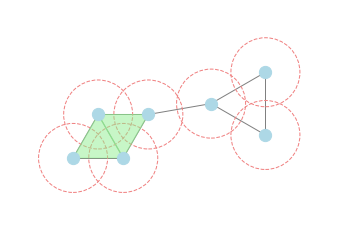

In [8]:
fig, ax = plt.subplots()
pos_final = nx.get_node_attributes(G_final, 'pos')
nx.draw(G_final, pos_final, with_labels=False, node_color='lightblue', node_size=150, edge_color='gray', ax=ax)

# radius plot
radius = threshold / 2
for point in points:
    circle = plt.Circle(point, radius, color='lightcoral', fill=False, linestyle='dashed')
    ax.add_artist(circle)

# check simplex dimension
triangles = []
for i, j, k in combinations(range(4), 3):
    if G_final.has_edge(i, j) and G_final.has_edge(i, k) and G_final.has_edge(j, k):
        triangles.append([points[i], points[j], points[k]])

# plot face
for triangle in triangles:
    triangle = np.array(triangle)
    plt.fill(triangle[:, 0], triangle[:, 1], color='lightgreen', alpha=0.5)

# set edges
padding = 0.5
all_x_final = points[:, 0]
all_y_final = points[:, 1]
ax.set_xlim([min(all_x_final) - radius - padding, max(all_x_final) + radius + padding])
ax.set_ylim([min(all_y_final) - radius - padding, max(all_y_final) + radius + padding])

plt.gca().set_aspect('equal', adjustable='box')
plt.show()